In [1]:
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 1s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


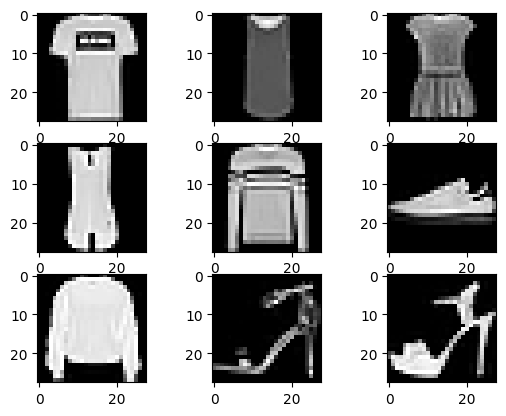

In [4]:
for i in range(1, 10):

    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)

    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [5]:
def model_arch():
	models = Sequential()

	# We are learning 64
	# filters with a kernal size of 5x5
	models.add(Conv2D(64, (5, 5),
					padding="same",
					activation="relu",
					input_shape=(28, 28, 1)))

	# Max pooling will reduce the
	# size with a kernal size of 2x2
	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(128, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))
	models.add(Conv2D(256, (5, 5), padding="same",
					activation="relu"))

	models.add(MaxPooling2D(pool_size=(2, 2)))

	# Once the convolutional and pooling
	# operations are done the layer
	# is flattened and fully connected layers
	# are added
	models.add(Flatten())
	models.add(Dense(256, activation="relu"))

	# Finally as there are total 10
	# classes to be added a FCC layer of
	# 10 is created with a softmax activation
	# function
	models.add(Dense(10, activation="softmax"))
	return models


In [6]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
			loss='sparse_categorical_crossentropy',
			metrics=['sparse_categorical_accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [7]:
history = model.fit(
	trainX.astype(np.float32), trainy.astype(np.float32),
	epochs=10,
	steps_per_epoch=100,
	validation_split=0.33
)


Epoch 1/10
100/100 [==============================] - 18s 74ms/step - loss: 3.2719 - sparse_categorical_accuracy: 0.6602 - val_loss: 0.4772 - val_sparse_categorical_accuracy: 0.8246
Epoch 2/10
100/100 [==============================] - 6s 60ms/step - loss: 0.3970 - sparse_categorical_accuracy: 0.8550 - val_loss: 0.3856 - val_sparse_categorical_accuracy: 0.8560
Epoch 3/10
100/100 [==============================] - 6s 60ms/step - loss: 0.3263 - sparse_categorical_accuracy: 0.8807 - val_loss: 0.3292 - val_sparse_categorical_accuracy: 0.8796
Epoch 4/10
100/100 [==============================] - 5s 51ms/step - loss: 0.2885 - sparse_categorical_accuracy: 0.8942 - val_loss: 0.3007 - val_sparse_categorical_accuracy: 0.8916
Epoch 5/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2553 - sparse_categorical_accuracy: 0.9061 - val_loss: 0.2926 - val_sparse_categorical_accuracy: 0.8944
Epoch 6/10
100/100 [==============================] - 6s 61ms/step - loss: 0.2375 - sparse_cat

In [8]:
model.save_weights('./model.h5', overwrite=True)

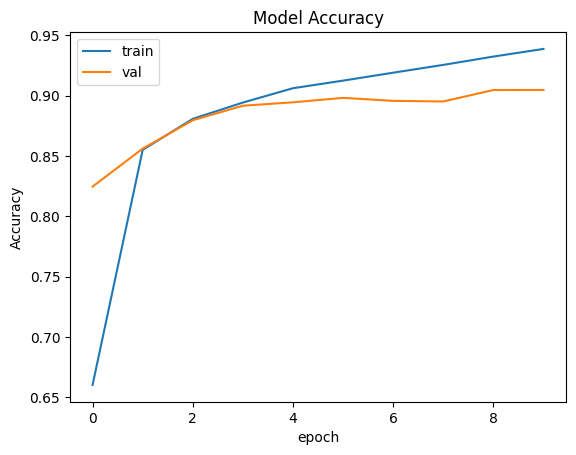

In [9]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


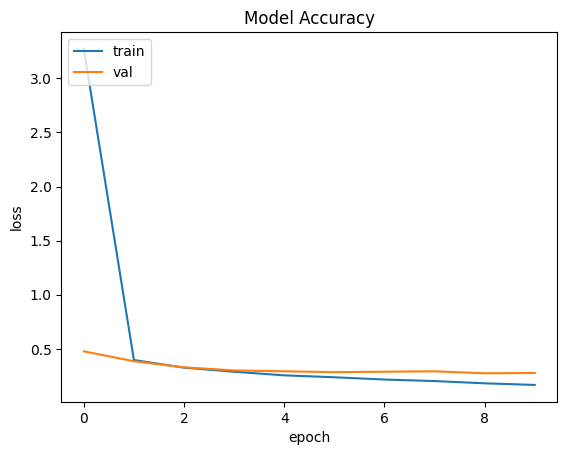

In [10]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [21]:
testX.shape

(10000, 28, 28)

In [28]:
testX

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

1/1 [==============================] - 0s 21ms/step
sandal


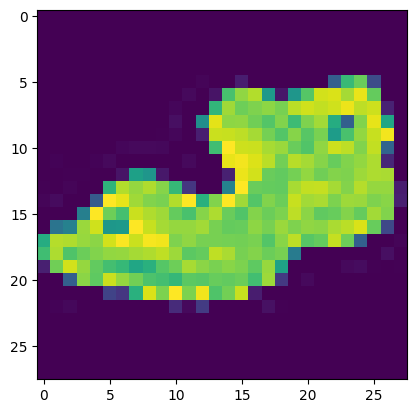

In [41]:
# There are 10 output labels for the
# Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover',
		'dress', 'coat', 'sandal', 'shirt',
		'sneaker', 'bag', 'ankle_boots']

# Make a prediction
predictions = model.predict(testX[502:503])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[502:503][0])
plt.show()
